# Genome reader

In [45]:
import json
import glob
import numpy as np
import pandas as pd
from os.path import join
import re  
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

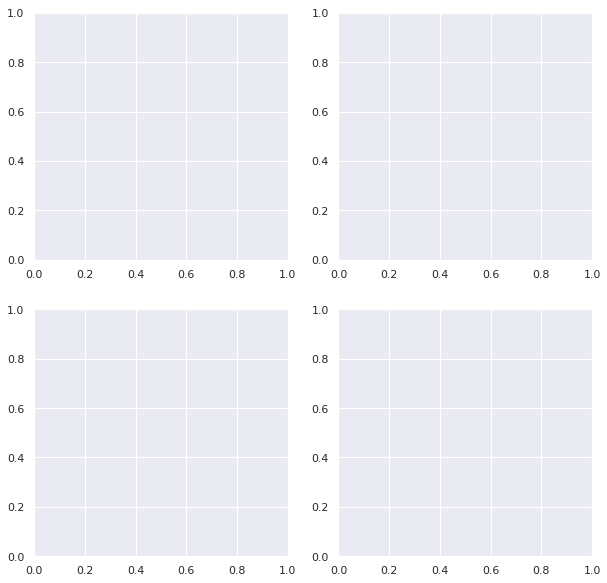

In [53]:
conds = [5000, 10000, 20000, 50000]
tps = ['canonical_bm', 'canonical_bm_tp']
evos = ['fitprop', 'cmaes']

values = []

for itp, tp in enumerate(tps):
    tpword = 'avec' if 'tp' in tp else 'sans'
    for ievo, evo in enumerate(evos):
        for cond in conds:
            paths = f'../../../logs/bm-iter-test*/{tp}/{evo}/{cond}/**/rep00'
            for i, curpath in enumerate(glob.glob(paths)):
                gen = max([int(re.search('genomes_(\d+)', fname).group(1)) for fname in glob.glob(join(curpath, 'genomes_*'))])
                filename = curpath
                with open(join(curpath, f'genomes_{gen}.txt')) as f:
                    out = np.array(json.load(f))
                for i in range(out.shape[0]):
                    values.append({'cond': cond, 'val': out[i, 0] * 10, 'run': i, 'evo': evo, 'tp': tpword})

In [54]:
df = pd.DataFrame(values)

/home/ecoffet/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


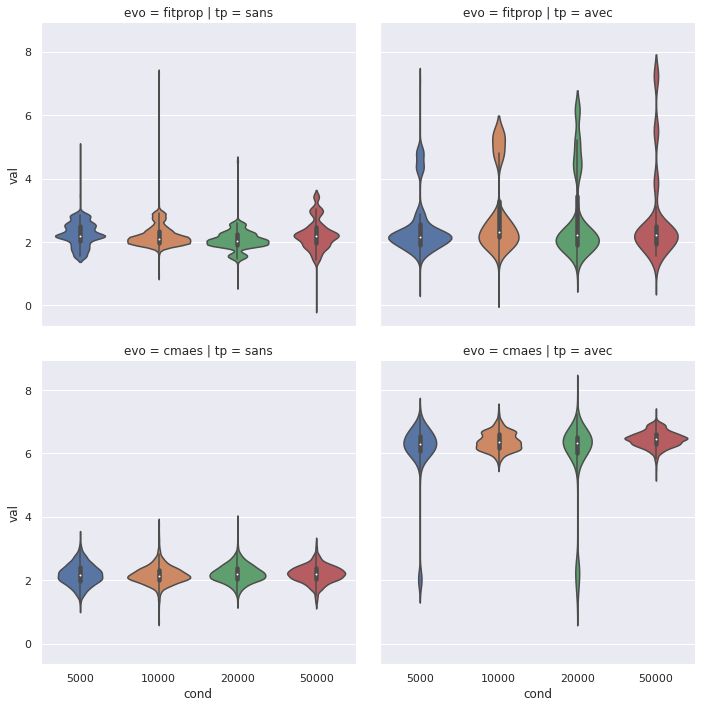

In [67]:
g = sns.catplot(data=df, col="tp", row="evo", x='cond', y='val', kind='violin')